# Christian Campbell
# Data Exploration and Analysis
# Final Project

In [1]:
'''Importing the necessary libraries'''

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import thinkstats2 as ts2
import thinkplot
import statsmodels.formula.api as smf
import seaborn as sns
from scipy.stats import poisson

## Data Set

For this project, I hope to look at the impact the number of minutes played has on the performance of a player in the NBA. On the surface, this might look like a question that has a very obvious answer. Logic dictates that the more time a player spends in the game, the more points they are likely to score. However for anyone that actually watches basketball, you'll find that this isn't always the case. It is not uncommon to see players who have more playing time, score less than players who played less minutes. Which leads us to the question on which the premis of this project is based.

Exactly how much of an impact does minutes played have on performance (aka points)?

To answer the question, I went to the NBA Stats website. 
https://www.nba.com/stats/alltime-leaders?PerMode=PerGame&ActiveFlag=Yes&StatCategory=MIN

I applied the following filters:
-  Season Type: Regular Season
-  Per Mode: Per Game
-  Stat Category: MIN
- Only Active Players: Selected

This filtered the data into 150 rows. After this was done, I downloaded everything into an Excel Spreadsheet.

The next step was to select the variables that I thought would best help me answer the project question. There were twenty-one variables. I selected five and extracted them from the original dataset. I then created a separate dataset in a different worksheet within the same excel file. The variables that I chose can be seen below. 

The final step was to import the data into Jupyter notebook.

In [2]:
'''This code imports the excel dataset into jupyter notebook.'''

nba_stats = pd.read_excel("NBA Advanced Stats.xlsx", sheet_name = "EDA_Project_Data")

In [3]:
nba_stats.head()

,MIN,PTS,FGM,FGA,FG%
0,38.0,27.2,10.0,19.7,50.5
1,36.7,27.3,9.3,18.7,49.9
2,36.3,25.2,8.1,18.6,43.9
3,34.7,24.6,7.3,16.5,44.2
4,34.7,19.0,7.1,15.8,44.9


In [4]:
nba_stats.tail()

,MIN,PTS,FGM,FGA,FG%
145,18.2,7.8,2.5,5.9,42.4
146,18.1,7.8,2.8,6.4,44.3
147,17.9,5.1,2.2,3.7,58.3
148,16.6,7.8,3.3,5.8,57.8
149,15.4,6.1,2.2,4.8,45.6


The five variables in this dataset are as follows:

-  MIN = Minutes Played;
-  PTS = Points Scored;
-  FGM = Field Goals Made;
-  FGA = Field Goals Attempted;
- FG% = Field Goal Percentage

## Descriptive Statistics

##### Statistic Summary

In [5]:
'''This code gives a summary of the dataset. It gives us the count, mean, standard deviation, minimum and maximum value.
It also gives us the the 25th, 50th and 75th percentile.'''

nba_stats.describe()

,MIN,PTS,FGM,FGA,FG%
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,27.900000,13.952667,5.099333,10.881333,47.312667
std,4.859793,5.464697,1.876721,4.018771,5.619027
min,15.400000,5.100000,2.000000,3.700000,38.700000
25%,24.125000,9.350000,3.600000,7.425000,43.600000
50%,28.650000,13.350000,4.900000,10.500000,45.600000
75%,31.750000,16.975000,6.275000,13.825000,49.600000
max,38.000000,27.700000,10.000000,20.200000,67.500000


##### Mode

In [6]:
'''Calculating the mode of the dataset. axis=o gets the mode of each column, or in this case, each variable.'''

nba_stats.mode(axis=0)

,MIN,PTS,FGM,FGA,FG%
0,29.5,7.8,3.6,5.8,45.5
1,NaN,10.8,NaN,13.4,NaN
2,NaN,16.9,NaN,NaN,NaN


While MIN, FGM and FG% had one mode each. The FGA variable is bimodal and PTS is trimodal.

##### Variance/Spread

In [7]:
'''Calculating the variance of the variables in the dataset.'''

nba_stats.var()

MIN    23.617584
PTS    29.862912
FGM     3.522080
FGA    16.150522
FG%    31.573463
dtype: float64

## Histogram

The codes in this section are to plot the histograms for my chosen variables. 

Even though on the right tail on the histograms for MIN, PTS, FGA, FG% it looks like there are outliers, I would argue the opposite. 

In the birth/pregnancy length example in the Think Stats book, data that shows a baby being born after just a month of the mother being pregnant would be considered an outlier. Similarly, a baby being born after 24 months of the mother being pregnant would also be an outlier. These cases are not only outlandish, they are also impossible. So it'll be easy to classify extremes like these as outliers. 

In the case of the nba statistics provided. It is very common for the top/franchise players to play massive amount of minutes, or score astronomical points, etc. The isolated bar colums on the right of the NBA stat histograms aren't outliers because it is not uncommon for them to happen in the NBA. 

##### MIN

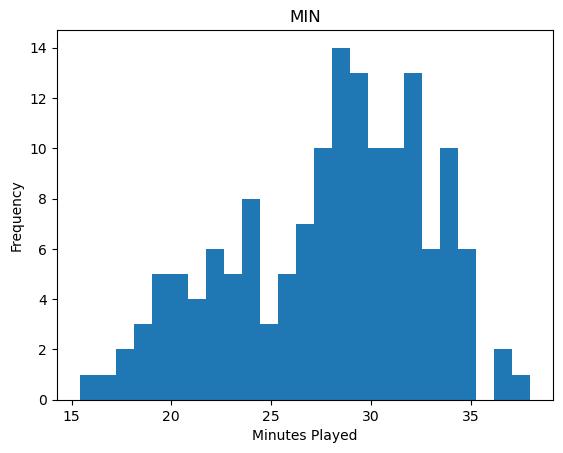

In [8]:
plt.hist(nba_stats['MIN'], bins=25)
plt.ylabel('Frequency')
plt.xlabel('Minutes Played')
plt.title('MIN')
plt.show()

##### PTS

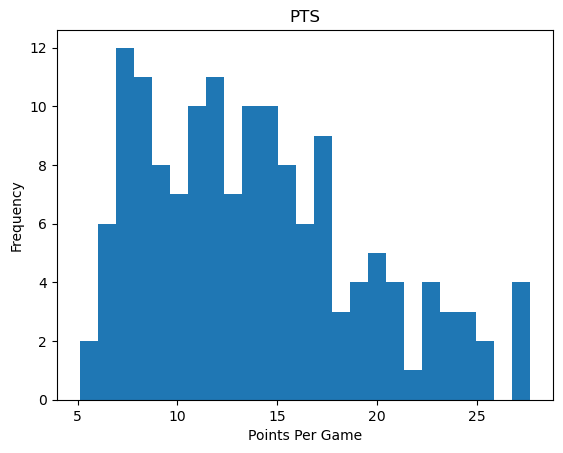

In [9]:
plt.hist(nba_stats['PTS'], bins=25)
plt.ylabel('Frequency')
plt.xlabel('Points Per Game')
plt.title('PTS')
plt.show()

##### FGM

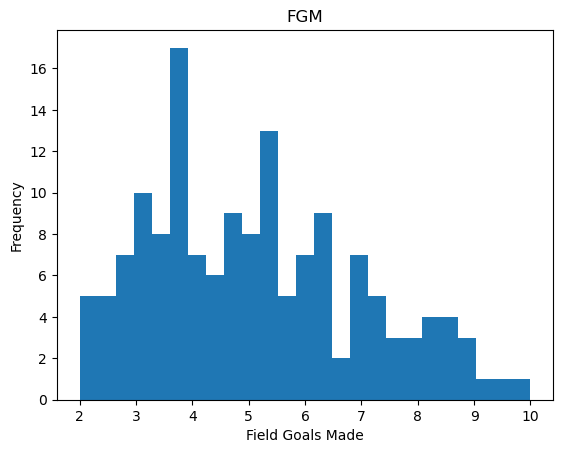

In [10]:
plt.hist(nba_stats['FGM'], bins=25)
plt.ylabel('Frequency')
plt.xlabel('Field Goals Made')
plt.title('FGM')
plt.show()

##### FGA

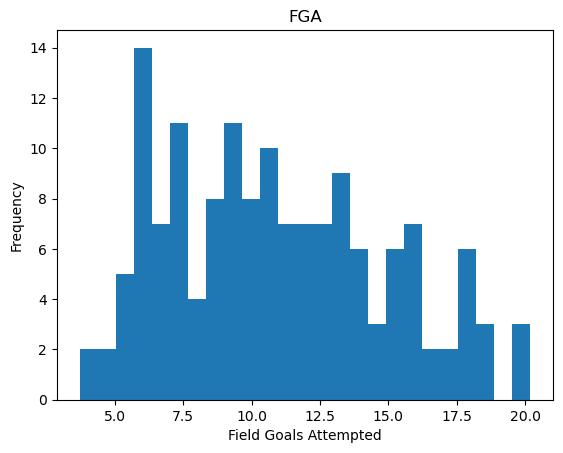

In [11]:
plt.hist(nba_stats['FGA'], bins=25)
plt.ylabel('Frequency')
plt.xlabel('Field Goals Attempted')
plt.title('FGA')
plt.show()

##### FG%

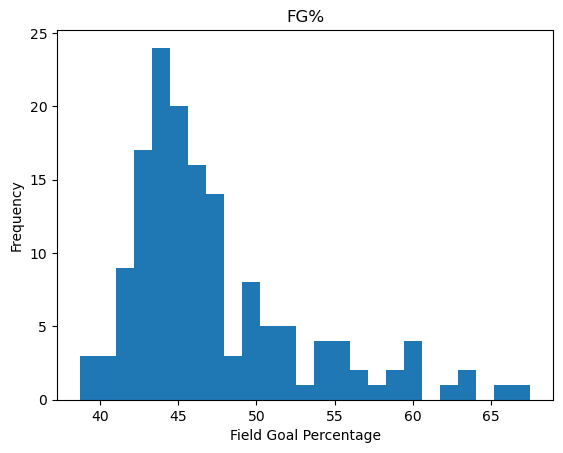

In [12]:
plt.hist(nba_stats['FG%'], bins=25)
plt.ylabel('Frequency')
plt.xlabel('Field Goal Percentage')
plt.title('FG%')
plt.show()

## Probability Mass Functions

In [14]:
'''I used the Pmf class provided by thinkstats2 to create a PMF for "field goals attempted" and "field goals made."'''

fga_pmf = ts2.Pmf(nba_stats['FGA'])
fgm_pmf = ts2.Pmf(nba_stats['FGM'])

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

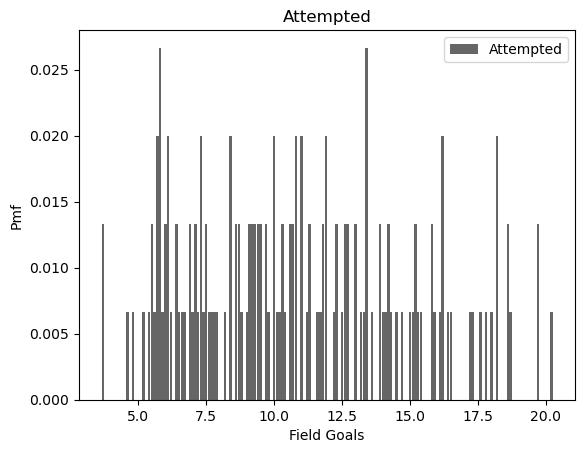

In [15]:
'''This code shows the PMF as a bar graph for Field Goals Attempted'''

thinkplot.Hist(fga_pmf, label='Attempted', color='black')
thinkplot.Config(xlabel="Field Goals", ylabel="Pmf", title='Attempted')

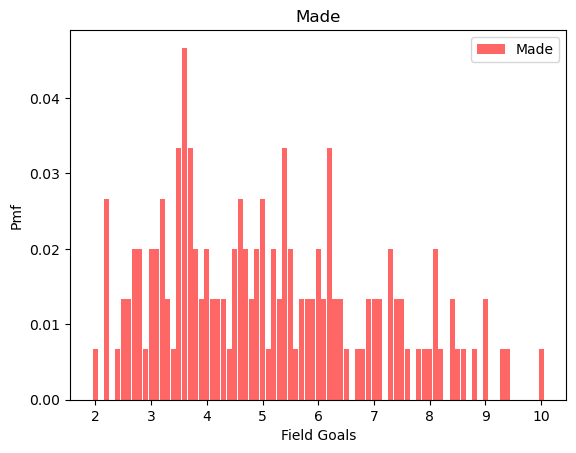

In [16]:
'''This code shows the PMF as a bar graph for Field Goals Made'''

thinkplot.Hist(fgm_pmf, label='Made', color='red')
thinkplot.Config(xlabel="Field Goals", ylabel="Pmf", title="Made")

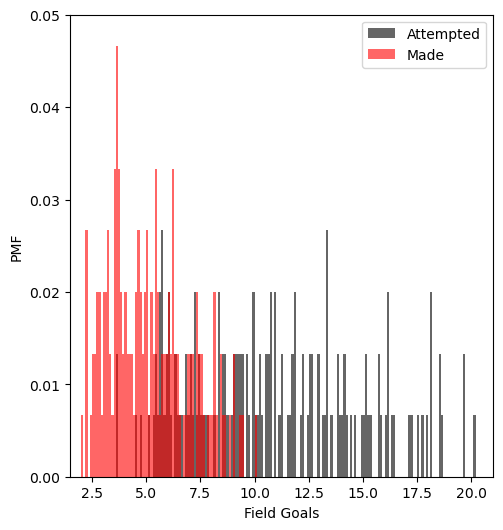

In [17]:
'''These codes plot both PMFs as bar graphs alongside each other. The red bars represent Field Goals attempted whilst
the blue bars represent Field Goals Made.'''

width=0.1
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(fga_pmf, align='right', width=width, color='black', label='Attempted')
thinkplot.Hist(fgm_pmf, align='left', width=width, color='red', label='Made')
thinkplot.Config(xlabel='Field Goals', ylabel='PMF', axis=[1.5, 21, 0, 0.05])

It is very clear by looking at the above PMF for field goals attempted and made that there are way more field goals attempted than made. After 10, there are no more field goals made, just field goals attempted. Whereas I expect the number of field goals made to be less than the number attempted, I didn't expect the difference to be so huge.

## Cumulative Distributive Function

In [18]:
'''This code turns the Field Goal Percentage into a CDF.'''

fgp_cdf = ts2.Cdf(nba_stats['FG%'])

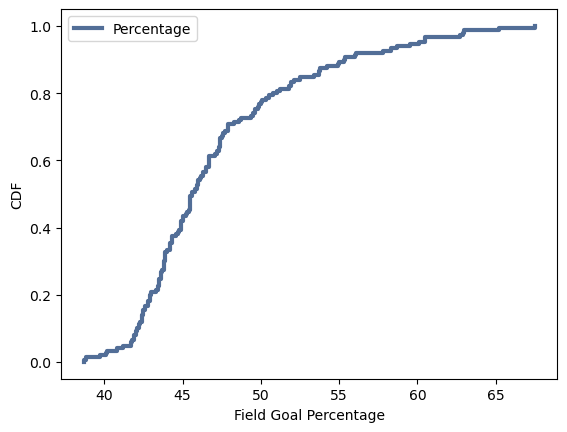

<Figure size 800x600 with 0 Axes>

In [19]:
'''This code chunk plots the Field Goal Percentage CDF as lines.'''

thinkplot.Cdf(fgp_cdf, label="Percentage")
thinkplot.Show(xlabel='Field Goal Percentage', ylabel='CDF')

It looks like eighty percent of FG% are below fifty and almost a hundred percent of FG% are below sixty-five. Seeing as FG% is the ratio of field goals made to field goals attempted, this would explain why the PMF bar graph comparing FGA and FGM came out the way it did. With the FGMs in the PMF bar graph above occuring at ten or below, which is to the left of the majority of FGAs. As to how this CDF addresses the question I'm trying to answer, it tells me that roughly half of the number of shots attempted actually go in. 

So therefore, increase the minutes and chances are the field goal attempts will increase, which in turn increases the field goals made. Since points and field goals made seem to have a strong positive correlation (as seen in the scatterplot below), points scored per game will also increase. 

## Analytical Distribution

##### Poisson distribution for Points

I chose a poisson distribution even though it wasn't in chapter 5 of the Think Stats book. Upon research I found out that the poisson distribution was the best analytical distribution model to represent NBA points. This is because it is often used for counting the number of events that happen in a fixed interval of time. In this case, the number of points scored in a game.

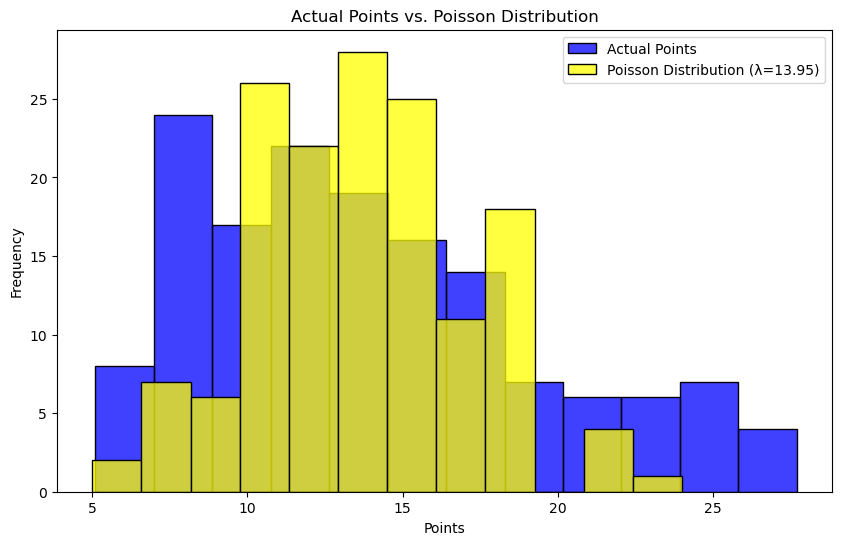

In [20]:
'''This code chunk plots and compares the PTS with the Poisson distribution for PTS in a bar graph.'''


lambda_parameter = nba_stats['PTS'].mean()
# This code generates a random sample of points using the mean of PTS
points_sample = np.random.poisson(lam=lambda_parameter, size=150)
plt.figure(figsize=(10, 6))
# Original distribution
sns.histplot(nba_stats['PTS'], bins=12, kde=False, color='blue', label='Actual Points')
# Poisson distribution
sns.histplot(points_sample, bins=12, kde=False, color='yellow', label=f'Poisson Distribution (λ={lambda_parameter:.2f})')

plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Actual Points vs. Poisson Distribution')
plt.legend()
plt.show()

The "actual points" plotted above seem to follow the skewness of what a poisson distribution should look like more than the poisson distribution plotted above does.

## Scatter Plots

##### Minutes Played x Points

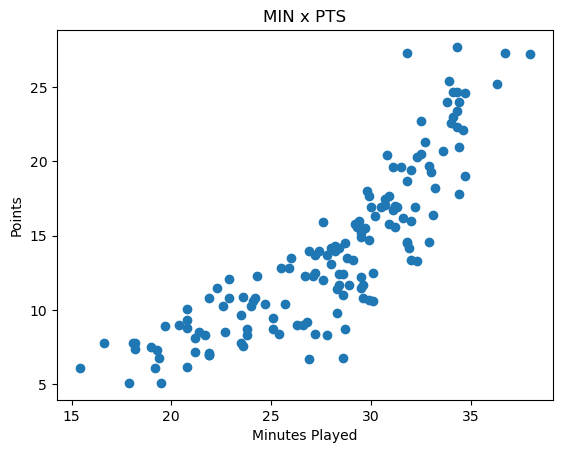

In [21]:
'''This code creates a scatter plot between Minutes and Points'''

plt.scatter(nba_stats['MIN'], nba_stats['PTS'])
plt.xlabel('Minutes Played')
plt.ylabel('Points')
plt.title('MIN x PTS')
plt.show()

In [22]:
'''This code gives the correlation between MIN and PTS'''

nba_stats.MIN.corr(nba_stats.PTS)

0.8551752821682047

##### Points x Field Goal Made

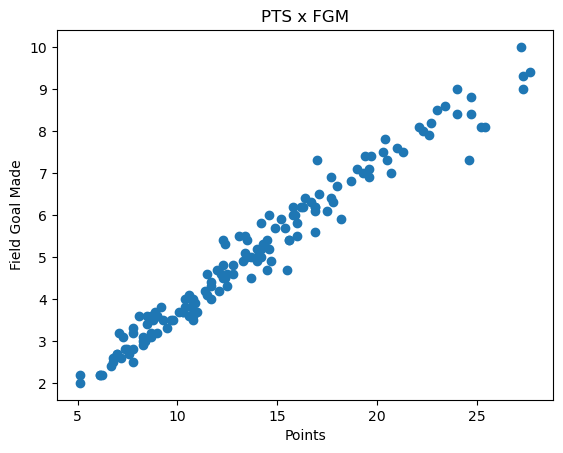

In [23]:
'''This code creates a scatter plot between Points and Field Goals Made'''

plt.scatter(nba_stats['PTS'], nba_stats['FGM'])
plt.xlabel('Points')
plt.ylabel('Field Goal Made')
plt.title('PTS x FGM')
plt.show()

In [24]:
'''This code gives the correlation between PTS and FGM'''

nba_stats.PTS.corr(nba_stats.FGM)

0.9822162323099014

The Scatter plots for 'MIN x PTS' and 'PTS x FGM' are both clearly linear, with the latter being more so. The slope for both also indicate a positive correlation. 

The corresponding pearson correlations that are calculated under each scatterplot proves the positive correlation of both. Furthermore with a correlation of 0.855 between 'Min x PTS' we can make the case that the two variables are very strongly correlated. When it comes to 'PTS x FGM' and their 0.982 correlation, the argument can be made there that the correlation is almost perfect.

As the old addage goes, 'correlation doesn't mean causation.' In the case of these two scatterplots above, correlation absolutely, positively does imply causation. 

## Hypothesis Test

#### Testing the Correlation

In [25]:
'''This class provided by Thinkstats performs a correlation hypothesis test by using a permutation test. TestStatistic
computes the absolute value of Pearson's correlation. RunModel shuffles the xs and returns simulated data.'''

class CorrelationPermute(ts2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(ts2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [26]:
'''This code provided by Think Stats reads the data and runs the test.'''

cleaned = nba_stats.dropna(subset=['MIN', 'PTS'])
data = cleaned.MIN.values, cleaned.PTS.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

The computed p-value is 0, which means that in 1000 trials we didn't see a correlation, under the null hypothesis, that exceeded the observed correlation. That means that the p-value is probably smaller than  1/1000 but it is not actually 0. The result shows that their is strong evidence against the null hypothesis of no correlation, as the observed correlation is so extreme that it was not replicated in any of the 1000 permutation trials. 

## Regression Analysis

In [27]:
'''This code chunk is performing a linear regression analysis using the statsmodels library.'''

# Defines formula for linear regression model
formula = 'MIN ~ PTS'
# Creates a model object using Ordinary Least Squares (OLS) regression from the statsmodels library
model = smf.ols(formula, data=nba_stats)
# Fits the linear regression model using the specified formula and the data
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MIN   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     402.9
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           4.42e-44
Time:                        20:46:02   Log-Likelihood:                -350.92
No. Observations:                 150   AIC:                             705.8
Df Residuals:                     148   BIC:                             711.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.2888      0.568     30.463      0.000      16.167      18.410
PTS            0.7605      0.038     20.071      0.000       0.686       0.835
==============================================================================
Omnibus:                        0.434   Durbin-Watson:                   0.996
Prob(Omnibus):                  0.805   Jarque-Bera (JB):                0.431
Skew:                          -0.126   Prob(JB):                        0.806
Kurtosis:                       2.925   Cond. No.                         41.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared of 0.731 suggests that 73.1% of the variability in the dependent variable is explained by the independent variable. Meaning that 73.1% of the variability in points is explained by the number of minutes played. The fact that the R-squared and the Adjusted R-squared are pretty much the same  suggests that the model's goodness of fit is not significantly affected by any number of independent variables.

In [4]:
pip install nbconvert

In [5]:
pip install pyppeteer


     -------------------------------------- 83.4/83.4 kB 234.4 kB/s eta 0:00:00
     ------------------------------------ 101.4/101.4 kB 307.1 kB/s eta 0:00:00
